<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_Age_Metallicity_Relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1769, done.
remote: Counting objects: 100% (681/681), done.
remote: Compressing objects: 100% (354/354), done.
remote: Total 1769 (delta 369), reused 589 (delta 326), pack-reused 1088
Receiving objects: 100% (1769/1769), 130.28 MiB | 13.32 MiB/s, done.
Resolving deltas: 100% (892/892), done.
Updating files: 100% (203/203), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

import warnings
warnings.filterwarnings("ignore")

In [3]:
def Ellipse(x,a,b):
  '''
   a: semi-major axis
   b: semi-minor axis
  '''
  y = b * ((1 - ((x/a)**2) )**0.5)
  return y

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

Ra_center = 296.23 #degree
Dec_center = -14.80167 #degree

Distance = 500 #Kpc

# Data Preparing

In [5]:
df_loc = pd.read_csv('/content/NGC_6822/Data_V3/Data_location.csv')

In [6]:
df_loc

,Unnamed: 0,Ra(J2000) deg,Dec(J2000) deg,Whitelock,Wyder,Bulge,Body,Bulge_Center,Bulge_North,Bulge_South
0,0,296.183980,-14.780180,1,0,1,0,1,0,0
1,1,296.252290,-14.784750,1,1,1,0,1,0,0
2,2,296.204150,-14.634860,1,0,0,0,0,0,0
3,3,296.223640,-14.774730,1,1,1,0,1,0,0
4,4,296.218160,-14.880350,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
324,324,296.044067,-14.905341,0,0,0,0,0,0,0
325,325,296.003693,-14.974893,0,0,0,0,0,0,0
326,326,295.993561,-14.990264,0,0,0,0,0,0,0
327,327,296.020050,-15.036669,0,0,0,0,0,0,0


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
list_AMR_df = []
for i in range(1,4):
  AMR_df = pd.read_csv("/content/NGC_6822/Age_Metallicity_relation/CEL "+str(i)+".csv")
  list_AMR_df.append(AMR_df)

In [9]:
Z = list(AMR_df['Z'])
print(Z)

[0.0015, 0.002, 0.003, 0.006, 0.008]


# ...

In [10]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [11]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [12]:
Z_name = '008'
df = pd.read_csv('/content/NGC_6822/Data_Correction_v3/NGC6822_LPV_Data_'+Z_name+'.csv')

In [13]:
Ks = np.arange(df['Ks'].min() - 2 ,df['Ks'].max() + 2,0.01)

In [14]:
df_sim = pd.DataFrame(Ks,columns=['Ks'])

In [15]:
for i in range(len(Z)):
  selected_Z = Z[i]
  selected_Z_name = str(Z[i]).split('.')[-1]

  df_sim['Log(M/Ms)_'+selected_Z_name] = np.nan
  df_sim['(M/Ms)_'+selected_Z_name] = np.nan
  df_sim['Log(t)_'+selected_Z_name] = np.nan
  df_sim['t_'+selected_Z_name] = np.nan

  Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
  Mag_Mass = Mag_Mass[Mag_Mass['Z'] == selected_Z]

  Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
  Mass_Age = Mass_Age[Mass_Age['Z'] == selected_Z]

  for j in range(len(df_sim)):
    a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_sim.loc[j,'Ks'] - DM )
    df_sim.loc[j,'Log(M/Ms)_'+selected_Z_name] = a * (df_sim.loc[j,'Ks'] - DM) +  b
    df_sim.loc[j,'(M/Ms)_'+selected_Z_name] = pow( 10 , a * (df_sim.loc[j,'Ks'] - DM) +  b )

    a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_sim.loc[j,'Log(M/Ms)_'+selected_Z_name],3))
    df_sim.loc[j,'Log(t)_'+selected_Z_name] = a * (df_sim.loc[j,'Log(M/Ms)_'+selected_Z_name]) +  b
    df_sim.loc[j,'t_'+selected_Z_name] = pow( 10 , df_sim.loc[j,'Log(t)_'+selected_Z_name] )


In [16]:
df_list_0 = []
for j in range(len(list_AMR_df)):
  df_list = []
  for i in range(len(list_AMR_df[j])):
    df_CEL = list_AMR_df[j]
    selected_Z = float(df_CEL.loc[i,'Z'])
    selected_Z_name = str(selected_Z).split('.')[-1]

    lupper_lim = float(df_CEL.loc[i,'log t upper limit'])
    lower_lim = float(df_CEL.loc[i,'log t lower limit'])

    df_prime = df_sim.copy()

    if lupper_lim > 0 :
      df_prime = df_prime[df_prime['Log(t)_'+selected_Z_name] < lupper_lim]
    if lower_lim > 0 :
      df_prime = df_prime[df_prime['Log(t)_'+selected_Z_name] > lower_lim]

    df_list.append(df_prime)
  df_list_0.append(df_list)

In [17]:
lsit_df_sim_prime = []
for j in range(len(df_list_0)):
  df_list = df_list_0[j]
  list_df_sim_prime_0 = []
  for k in range(len(df_list)):
    i = len(df_list) - k -1
    selected_Z = float(df_CEL.loc[i,'Z'])
    selected_Z_name = str(selected_Z).split('.')[-1]
    df_sim_prime_0 = pd.DataFrame()
    df_sim_prime_0['Ks'] = df_list[i]['Ks']-DM
    df_sim_prime_0['t'] = df_list[i]['t_'+selected_Z_name]
    df_sim_prime_0['log(t)'] = np.log10(df_sim_prime_0['t'])
    df_sim_prime_0['M/Ms'] = df_list[i]['(M/Ms)_'+selected_Z_name]
    df_sim_prime_0['log(M/Ms)'] = np.log10(df_sim_prime_0['M/Ms'])
    df_sim_prime_0['Z'] = selected_Z
    list_df_sim_prime_0.append(df_sim_prime_0)

  df_sim_prime = pd.concat(list_df_sim_prime_0,axis=0)
  df_sim_prime = df_sim_prime.reset_index(drop = True)
  lsit_df_sim_prime.append(df_sim_prime)



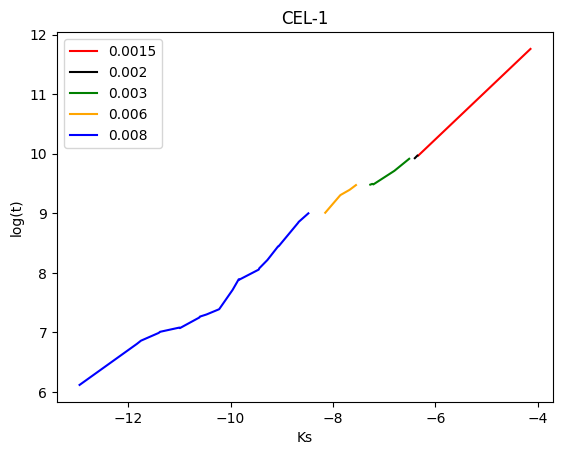

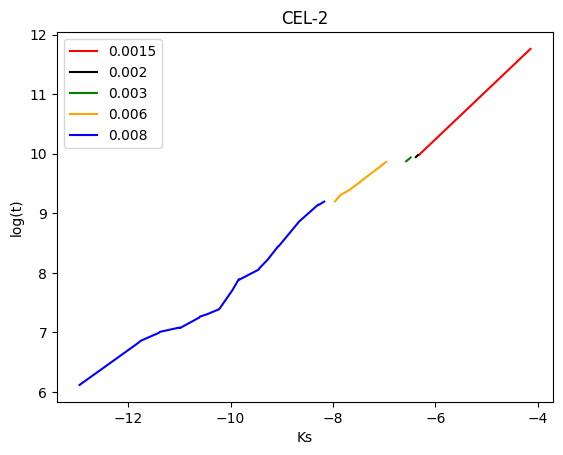

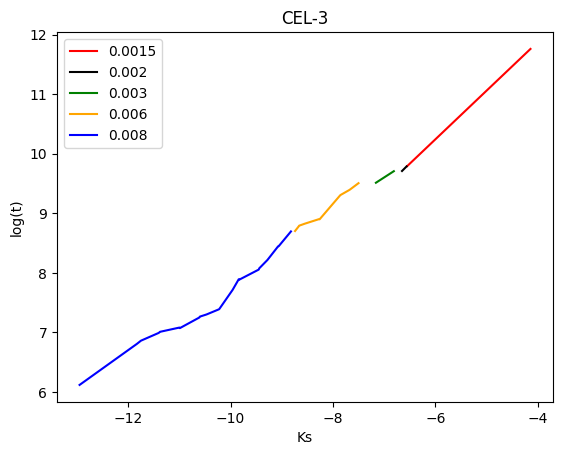

In [18]:
colors = ['red','black','green','orange','blue']
for j in range(len(df_list_0)):
  df_0 = lsit_df_sim_prime[j]
  for i in range(len(Z)):
    selected_Z = (Z[i])
    df_prime = df_0[df_0['Z'] == selected_Z]
    plt.plot(df_prime['Ks'],df_prime['log(t)'],c=colors[i],label = str(selected_Z))

  plt.ylabel('log(t)')
  plt.xlabel('Ks')
  plt.title('CEL-'+str(j+1))
  plt.legend()
  plt.savefig('/content/CEL_' + str(j+1)+'_Age_Mag.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

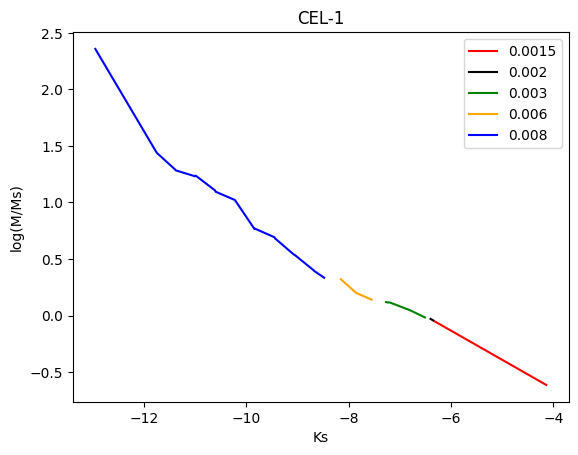

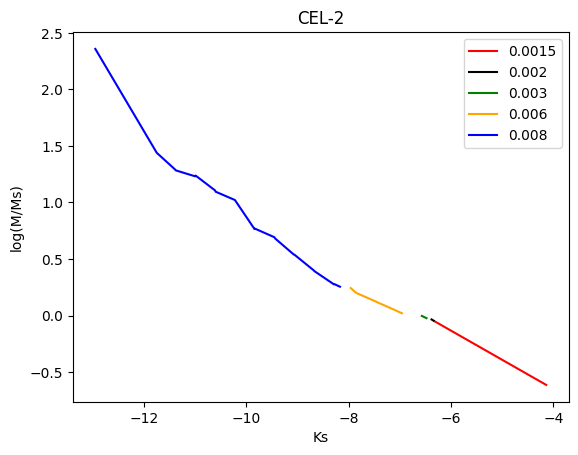

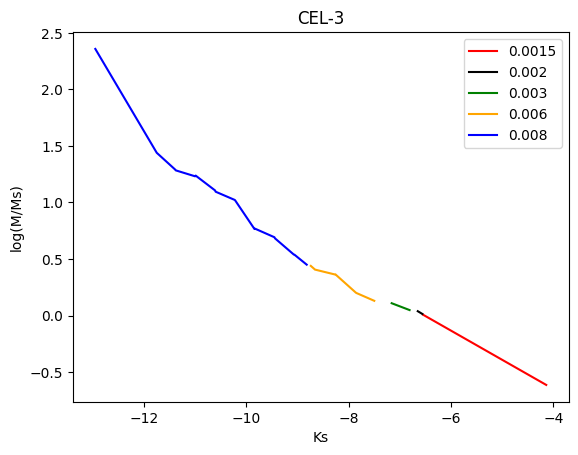

In [19]:
colors = ['red','black','green','orange','blue']
for j in range(len(df_list_0)):
  df_0 = lsit_df_sim_prime[j]
  for i in range(len(Z)):
    selected_Z = (Z[i])
    df_prime = df_0[df_0['Z'] == selected_Z]
    plt.plot(df_prime['Ks'],df_prime['log(M/Ms)'],c=colors[i],label = str(selected_Z))


  plt.ylabel('log(M/Ms)')
  plt.xlabel('Ks')
  plt.title('CEL-'+str(j+1))
  plt.legend()
  plt.savefig('/content/CEL_' + str(j+1)+'_Mag_Mass.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

In [21]:
import numpy as np
from astropy.modeling import models, fitting

selected_df = lsit_df_sim_prime[0]
# Generate or import your data points (x, y) for the curve

x_curve = np.array(selected_df['Ks'])
y_curve = np.array(selected_df['log(t)'])

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []

# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
index_1_prime = [0,120,200, 270 , 320 , 350, 400,420,449,475,509, 585,591,650,len(x_curve)]

for i in range(len(index_1_prime)-1):

    x_segment = x_curve[index_1_prime[i]:index_1_prime[i+1]+1]
    y_segment = y_curve[index_1_prime[i]:index_1_prime[i+1]+1]

    lower_lim.append(np.round(x_segment[0],3))
    higher_lim.append(np.round(x_segment[-1],3))

    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]

    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(np.round(slope_,3))
    intercepts_prime.append(np.round(intercep_,3))

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes_prime[i]}, Intercept = {slopes_prime[i]}")


# Making Data frame for SFH calculation
columns = ['a','b','K validity range (lower limit)','K validity range (upper limit)']

# Calling DataFrame constructor after zipping
# both lists, with columns specified
Mag_Age_df = pd.DataFrame(list(zip( slopes,intercepts,
                               lower_lim,higher_lim )), columns =columns)

Mag_Age_df_prime = pd.DataFrame(list(zip( slopes_prime,intercepts_prime,
                               lower_lim,higher_lim )), columns =columns)

Mag_Age_df.to_csv("Mag_Age_relation_data.csv")
Mag_Age_df_prime.to_csv("Mag_Age_relation_data_prime.csv")

Segment 1: Slope = 0.62, Intercept = 0.62
Segment 2: Slope = 0.287, Intercept = 0.287
Segment 3: Slope = 0.413, Intercept = 0.413
Segment 4: Slope = 1.084, Intercept = 1.084
Segment 5: Slope = 0.445, Intercept = 0.445
Segment 6: Slope = 1.013, Intercept = 1.013
Segment 7: Slope = 1.037, Intercept = 1.037
Segment 8: Slope = 0.413, Intercept = 0.413
Segment 9: Slope = 1.004, Intercept = 1.004
Segment 10: Slope = 0.33, Intercept = 0.33
Segment 11: Slope = 0.511, Intercept = 0.511
Segment 12: Slope = 0.654, Intercept = 0.654
Segment 13: Slope = 0.818, Intercept = 0.818
Segment 14: Slope = 0.818, Intercept = 0.818


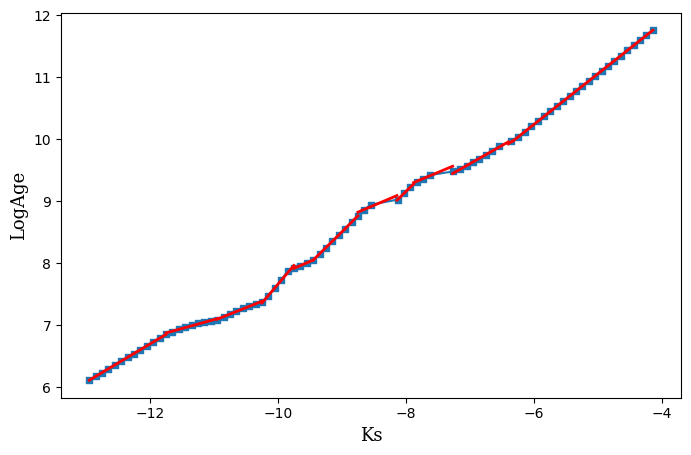

In [22]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve[::10],y_curve[::10], s = 15 , marker='s' )
plt.plot(x_curve[::10],y_curve[::10])
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 10)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
  plt.xlabel('Ks', fontsize = 13, fontname = "serif")

  plt.savefig("Mag_Age_relation_fitted_line.png", dpi = 400)

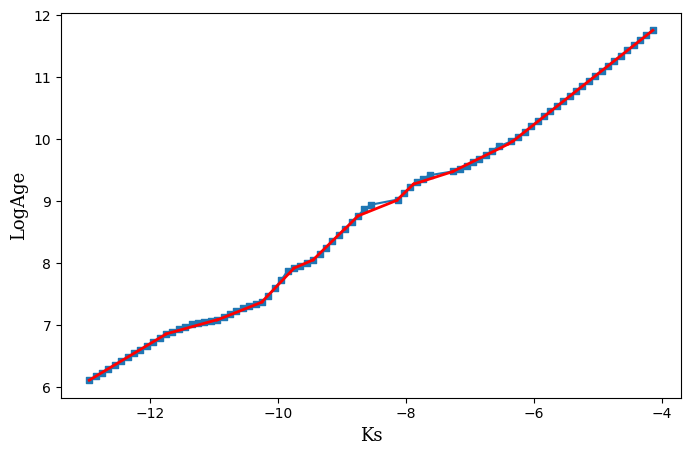

In [23]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve[::10],y_curve[::10], s = 15 , marker='s' )
plt.plot(x_curve[::10],y_curve[::10])
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 10)

  # Calculate y values based on the slope
  y = slopes_prime[i] * x + intercepts_prime[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
  plt.xlabel('Ks', fontsize = 13, fontname = "serif")

  plt.savefig("Mag_Age_relation_fitted_line_priem.png", dpi = 400)

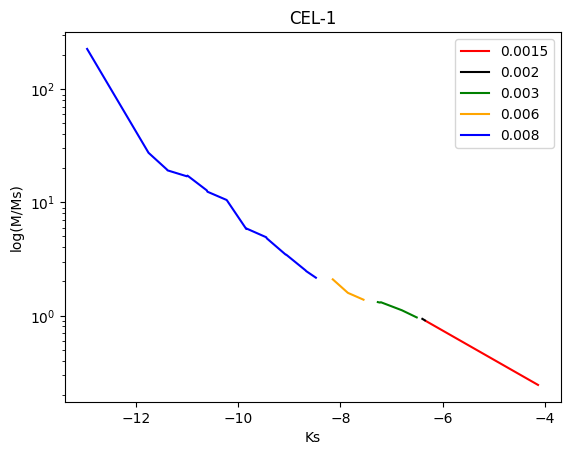

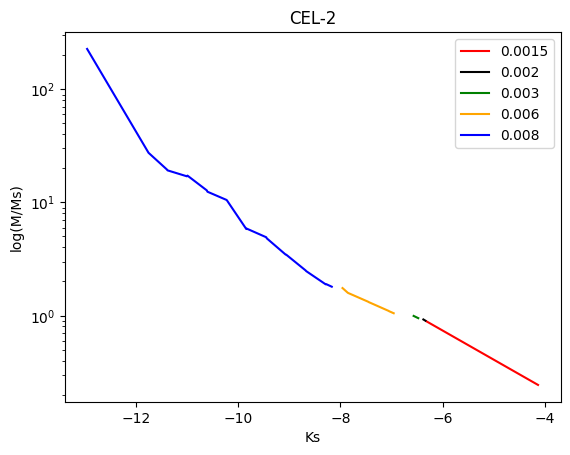

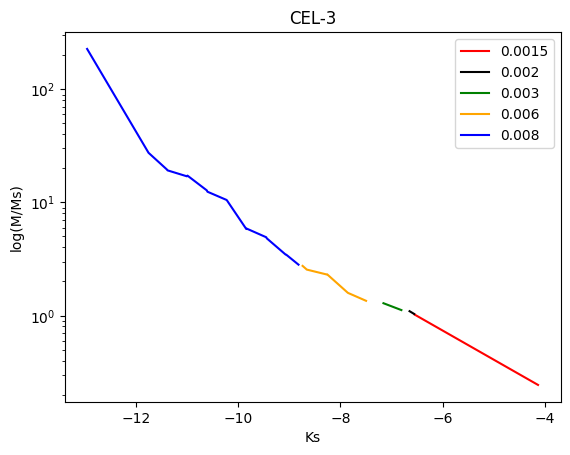

In [24]:
colors = ['red','black','green','orange','blue']
for j in range(len(df_list_0)):
  df_list = df_list_0[j]
  for i in range(len(df_list)):
    selected_Z = float(df_CEL.loc[i,'Z'])
    selected_Z_name = str(selected_Z).split('.')[-1]
    plt.plot(df_list[i]['Ks']-DM,df_list[i]['(M/Ms)_'+selected_Z_name],c=colors[i],label = str(selected_Z))

  plt.yscale('log')
  plt.ylabel('log(M/Ms)')
  plt.xlabel('Ks')
  plt.title('CEL-'+str(j+1))
  plt.legend()
  plt.savefig('/content/CEL_' + str(j+1)+'_Mag_Mass.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

In [28]:
import numpy as np
from astropy.modeling import models, fitting

selected_df = lsit_df_sim_prime[0]
# Generate or import your data points (x, y) for the curve

x_curve = np.array(selected_df['Ks'])
y_curve = np.array(selected_df['log(M/Ms)'])

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []

# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
index_1_prime = [0,109,117,125,131,137,143,158,164,173,185,195,202,210,220,233,240,250,267,277,293,307,314,323,347,353,433,445,450,475,485,503,510,517,521,569,580,590,len(x_curve)]

for i in range(len(index_1_prime)-1):

    x_segment = x_curve[index_1_prime[i]:index_1_prime[i+1]+1]
    y_segment = y_curve[index_1_prime[i]:index_1_prime[i+1]+1]

    lower_lim.append(np.round(x_segment[0],3))
    higher_lim.append(np.round(x_segment[-1],3))

    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]

    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(np.round(slope_,3))
    intercepts_prime.append(np.round(intercep_,3))

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes_prime[i]}, Intercept = {intercepts_prime[i]}")


# Making Data frame for SFH calculation
columns = ['a','b','K validity range (lower limit)','K validity range (upper limit)']


# Calling DataFrame constructor after zipping
# both lists, with columns specified
Mass_Age_df = pd.DataFrame(list(zip(slopes,intercepts,
                               lower_lim,higher_lim )), columns =columns)

Mass_Age_df_prime = pd.DataFrame(list(zip(slopes_prime,intercepts_prime,
                               lower_lim,higher_lim )), columns =columns)

Mass_Age_df.to_csv("Mag_Mass_relation_data.csv")
Mass_Age_df_prime.to_csv("Mag_Mass_relation_data_prime.csv")

Segment 1: Slope = -0.767, Intercept = -7.575
Segment 2: Slope = -0.767, Intercept = -7.575
Segment 3: Slope = -0.523, Intercept = -4.704
Segment 4: Slope = -0.412, Intercept = -3.402
Segment 5: Slope = -0.412, Intercept = -3.402
Segment 6: Slope = -0.412, Intercept = -3.402
Segment 7: Slope = -0.412, Intercept = -3.403
Segment 8: Slope = -0.139, Intercept = -0.298
Segment 9: Slope = -0.139, Intercept = -0.298
Segment 10: Slope = -0.139, Intercept = -0.298
Segment 11: Slope = -0.139, Intercept = -0.298
Segment 12: Slope = -0.203, Intercept = -1.004
Segment 13: Slope = -0.346, Intercept = -2.565
Segment 14: Slope = -0.346, Intercept = -2.565
Segment 15: Slope = -0.346, Intercept = -2.565
Segment 16: Slope = -0.347, Intercept = -2.573
Segment 17: Slope = -0.195, Intercept = -0.972
Segment 18: Slope = -0.195, Intercept = -0.972
Segment 19: Slope = -0.398, Intercept = -3.061
Segment 20: Slope = -0.671, Intercept = -5.838
Segment 21: Slope = -0.671, Intercept = -5.838
Segment 22: Slope = -0

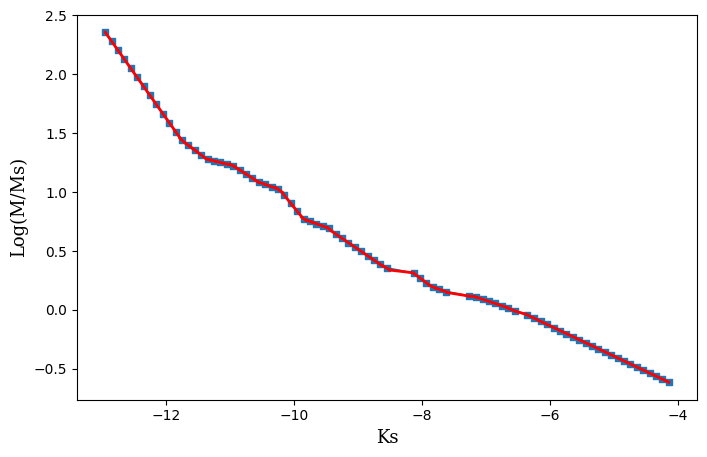

In [29]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve[::10],y_curve[::10], s = 15 , marker='s' )
plt.plot(x_curve[::10],y_curve[::10])
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 10)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('Log(M/Ms)', fontsize = 13, fontname = "serif")
  plt.xlabel('Ks', fontsize = 13, fontname = "serif")

  plt.savefig("Mag_Mass_relation_fitted_line.png", dpi = 400)

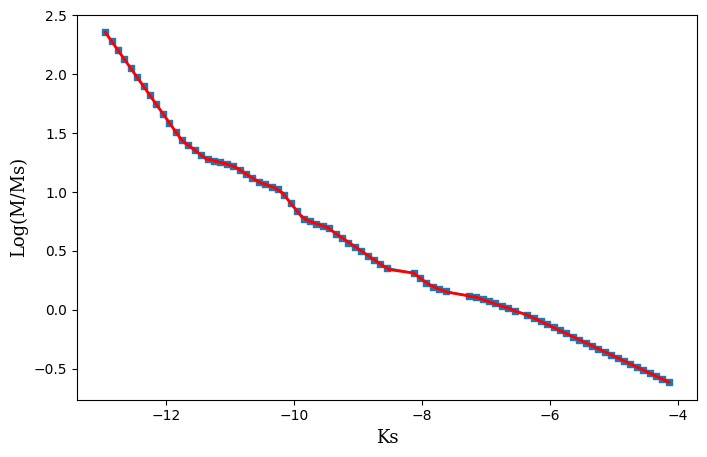

In [30]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve[::10],y_curve[::10], s = 15 , marker='s' )
plt.plot(x_curve[::10],y_curve[::10])
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 10)

  # Calculate y values based on the slope
  y = slopes_prime[i] * x + intercepts_prime[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('Log(M/Ms)', fontsize = 13, fontname = "serif")
  plt.xlabel('Ks', fontsize = 13, fontname = "serif")

  plt.savefig("Mag_Mass_relation_fitted_line_prime.png", dpi = 400)